[Reference](https://www.tensorflow.org/agents/tutorials/7_SAC_minitaur_tutorial)

In [1]:
pip install pybullet

     |████████████████████████████████| 88.7MB 62kB/s 


In [5]:
!pip install stable-baselines3[extra] pybullet

     |████████████████████████████████| 153kB 5.2MB/s 


In [9]:
import gym
import pybullet_envs

ENV_ID = "MinitaurBulletEnv-v0"
RENDER = True

if __name__=="main":
    spec = gym.env.registery.spec(ENV_ID)
    spec._kwargs['render'] = RENDER
    env = gym.make(ENV_ID)

    print(env.observation_space)
    print(env.acitons_space, env.action_space.sample())

    print(env)
    print(env.reset())
    input("press any key to exit\n")
    env.clos()

In [7]:
import os 

import pybullet_envs

from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecNormalize

In [10]:
env = make_vec_env("HalfCheetahBulletEnv-v0", n_envs=1)

env = VecNormalize(env, norm_obs=True, norm_reward=True, clip_obs=10.)

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [11]:
model = PPO('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=2000)

Using cpu device
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 1e+03     |
|    ep_rew_mean     | -1.33e+03 |
| time/              |           |
|    fps             | 409       |
|    iterations      | 1         |
|    time_elapsed    | 4         |
|    total_timesteps | 2048      |
----------------------------------


In [13]:
# Don't forget to save the VecNormalize statistics when saving the agent
log_dir = "/tmp/"
model.save(log_dir + "ppo_halfcheetah")
stats_path = os.path.join(log_dir, "vec_normalize.pkl")
env.save(stats_path)

In [14]:
# Load the agent
model = PPO.load(log_dir + "ppo_halfcheetah")

# Load the saved statistics
env = make_vec_env("HalfCheetahBulletEnv-v0", n_envs=1)
env = VecNormalize.load(stats_path, env)
#  do not update them at test time
env.training = False
# reward normalization is not needed at test time
env.norm_reward = False

/usr/local/lib/python3.7/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [15]:
from stable_baselines3.common.evaluation import evaluate_policy

In [16]:
mean_reward, std_reward = evaluate_policy(model, env)

print(f"Mean reward = {mean_reward:.2f} +/- {std_reward:.2f}")

Mean reward = -1358.75 +/- 41.85


In [17]:
#you can enable the GPU by changing the runtime
import os
os.environ['MESA_GL_VERSION_OVERRIDE'] = '3.3'
os.environ['MESA_GLSL_VERSION_OVERRIDE'] = '330'
import pybullet as p
import pybullet_data as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline
p.connect(p.DIRECT)
#allow to find the assets (URDF, obj, textures etc)
p.setAdditionalSearchPath(pd.getDataPath())
#optionally enable GPU for faster rendering in pybullet.getCameraImage
enableGPU = False
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
import GPUtil as GPU
import sys
# Get all device ids and their processing and memory utiliazion
# (deviceIds, gpuUtil, memUtil) = GPU.getGPUs()

# Print os and python version information
print('OS: ' + sys.platform)
print(sys.version)

# Print package name and version number
print(GPU.__name__ + ' ' + GPU.__version__)

# Show the utilization of all GPUs in a nice table
GPU.showUtilization()

# Show all stats of all GPUs in a nice table
GPU.showUtilization(all=True)

# NOTE: If all your GPUs currently have a memory consumption larger than 1%,
# this step will fail. It's not a bug! It is intended to do so, if it does not
# find an available GPU.
GPUs = GPU.getGPUs()
numGPUs = len(GPU.getGPUs())
print("numGPUs=",numGPUs)
if numGPUs > 0:
  enableGPU = True
eglPluginId = -1
if enableGPU:
  import pkgutil
  egl = pkgutil.get_loader('eglRenderer')
  if (egl):
    eglPluginId = p.loadPlugin(egl.get_filename(), "_eglRendererPlugin")
  else:
    eglPluginId = p.loadPlugin("eglRendererPlugin")

if eglPluginId>=0:
  print("Using GPU hardware (eglRenderer)")  
else:
  print("using CPU renderer (TinyRenderer)")

  Created wheel for gputil: filename=GPUtil-1.4.0-cp37-none-any.whl size=7411 sha256=2e26806098b8665e4d55bf41699c89fb5f7defb395310018520b19a7601baa72
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
OS: linux
3.7.10 (default, Feb 20 2021, 21:17:23) 
[GCC 7.5.0]
GPUtil 1.4.0
| ID | GPU | MEM |
------------------
| ID | Name | Serial | UUID || GPU temp. | GPU util. | Memory util. || Memory total | Memory used | Memory free || Display mode | Display active |
--------------------------------------------------------------------------------------------------------------------------------------------------
numGPUs= 0
using CPU renderer (TinyRenderer)


In [18]:
p.resetSimulation()
p.configureDebugVisualizer(p.COV_ENABLE_GUI)
useFixedBase = True
flags = p.URDF_INITIALIZE_SAT_FEATURES

plane_pos = [0,0,-0.625]
plane = p.loadURDF("plane.urdf", plane_pos, flags = flags, useFixedBase=useFixedBase)
table_pos = [0,0,-0.625]
table = p.loadURDF("table/table.urdf", table_pos, flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("xarm/xarm6_robot.urdf", flags = flags, useFixedBase=useFixedBase)
xarm = p.loadURDF("laikago/laikago_toes.urdf", [1,0,-0.15],[0, 0.5, 0.5, 0], flags = flags, useFixedBase=useFixedBase)



,
,


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


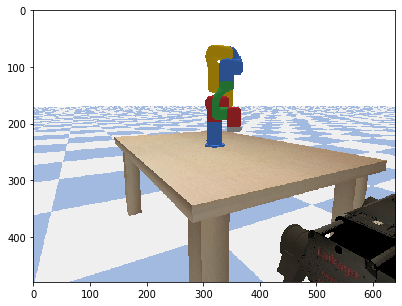

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


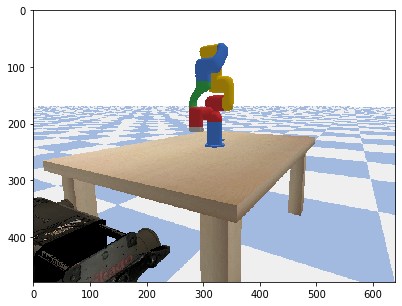

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


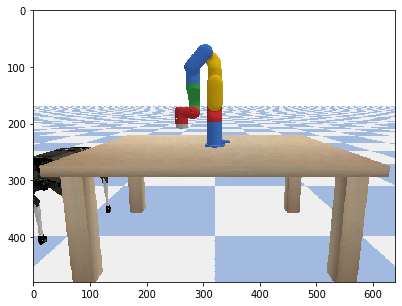

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

w= 640 h= 480


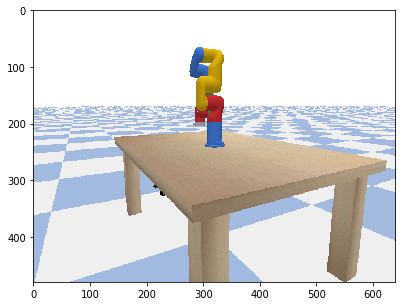

<IPython.core.display.Javascript object>

CPU times: user 1.75 s, sys: 99.6 ms, total: 1.85 s
Wall time: 1.92 s


In [19]:
%%time
camTargetPos = [0, 0, 0]
cameraUp = [0, 0, 1]
cameraPos = [1, 1, 1]
p.setGravity(0, 0, -10)

from google.colab import widgets
import numpy as np
import random
import time
from matplotlib import pylab
grid = widgets.Grid(2, 2)
yaw = 0
for r in range(2):
  for c in range(2):
    yaw += 60
    with grid.output_to(r, c):
      grid.clear_cell()
      pylab.figure(figsize=(10, 5))
      pitch = -10.0
      roll = 0
      upAxisIndex = 2
      camDistance = 1.5
      pixelWidth = 640
      pixelHeight = 480
      nearPlane = 0.01
      farPlane = 100
      fov = 60
      viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                  roll, upAxisIndex)
      aspect = pixelWidth / pixelHeight
      projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
          
      img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
      w = img_arr[0]  #width of the image, in pixels
      h = img_arr[1]  #height of the image, in pixels
      rgb = img_arr[2]  #color data RGB
      dep = img_arr[3]  #depth data
      print("w=",w,"h=",h)
      np_img_arr = np.reshape(rgb, (h, w, 4))
      np_img_arr = np_img_arr * (1. / 255.)
      pylab.imshow(np_img_arr, interpolation='none', animated=True, label="pybullet")


   


creating animated png, please about 5 seconds
CPU times: user 4.87 s, sys: 10.1 ms, total: 4.88 s
Wall time: 4.88 s
CPU times: user 2.41 ms, sys: 989 µs, total: 3.4 ms
Wall time: 2.19 ms


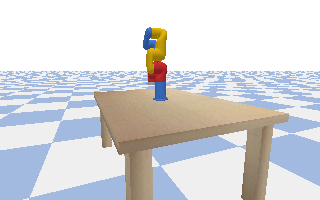

In [20]:
!pip install numpngw
from numpngw import write_apng
from IPython.display import Image


frames=[] #frames to create animated png
for r in range(60):
    yaw += 6
    pitch = -10.0
    roll = 0
    upAxisIndex = 2
    camDistance = 1.5
    pixelWidth = 320
    pixelHeight = 200
    nearPlane = 0.01
    farPlane = 100
    fov = 60
    viewMatrix = p.computeViewMatrixFromYawPitchRoll(camTargetPos, camDistance, yaw, pitch,
                                                                roll, upAxisIndex)
    aspect = pixelWidth / pixelHeight
    projectionMatrix = p.computeProjectionMatrixFOV(fov, aspect, nearPlane, farPlane)
        
    img_arr = p.getCameraImage(pixelWidth,pixelHeight,viewMatrix,projectionMatrix)
    w = img_arr[0]  #width of the image, in pixels
    h = img_arr[1]  #height of the image, in pixels
    rgb = img_arr[2]  #color data RGB
    dep = img_arr[3]  #depth data
    #print("w=",w,"h=",h)
    np_img_arr = np.reshape(rgb, (h, w, 4))
    frame = np_img_arr[:, :, :3]
    frames.append(frame)
print("creating animated png, please about 5 seconds")
%time write_apng("example6.png", frames, delay=100)
%time Image(filename="example6.png")